In [2]:
%load_ext autoreload
%autoreload 2

In [76]:
from transformers import ViTFeatureExtractor, TFAutoModel
from PIL import Image
import tensorflow as tf
from carb_calc.ml_logic.model import prediction
import cv2
import os
import matplotlib.pyplot as plt
from torchvision import datasets
from torch.utils.data import DataLoader
import numpy as np

In [3]:
base_model = TFAutoModel.from_pretrained('google/vit-base-patch16-224')

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFViTModel: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing TFViTModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFViTModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFViTModel were not initialized from the PyTorch model and are newly initialized: ['vit.pooler.dense.weight', 'vit.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [4]:
feature_extractor = ViTFeatureExtractor.from_pretrained("google/vit-base-patch16-224")

/Users/kymbradshaw/.pyenv/versions/3.10.6/envs/carbon_calculator/lib/python3.10/site-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [145]:
image = Image.open('../test_images/orange_2.jpg')

In [6]:
processed_image = feature_extractor(images=image, return_tensors="tf")

In [7]:
embeddings = base_model(processed_image)

In [8]:
X = embeddings.last_hidden_state

In [9]:
X.shape

TensorShape([1, 197, 768])

In [10]:
X = X[:,0,:]

In [11]:
X.shape

TensorShape([1, 768])

In [80]:
file_path_train = '/Users/kymbradshaw/Downloads/fruits_360/fruits-360_dataset/fruits-360/Training'
file_path_test = '/Users/kymbradshaw/Downloads/fruits_360/fruits-360_dataset/fruits-360/Test'

In [81]:
train = tf.keras.utils.image_dataset_from_directory(file_path_train, labels='inferred', label_mode='categorical', color_mode='rgb', batch_size=32, image_size=(100,100), shuffle=True)
test = tf.keras.utils.image_dataset_from_directory(file_path_test, labels='inferred', label_mode='categorical', color_mode='rgb', batch_size=32, image_size=(100,100))

Found 67692 files belonging to 131 classes.
Found 22688 files belonging to 131 classes.


In [82]:
model_filepath = '/Users/kymbradshaw/Downloads/first_model.keras'

In [83]:
tuned_model = tf.keras.saving.load_model(model_filepath)

In [84]:
tuned_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

In [85]:
testing_image=feature_extractor(images=image, return_tensors="tf")

In [86]:
embeddings = base_model(testing_image)
X = embeddings.last_hidden_state
X = X[:,0,:]

In [87]:
output = tuned_model.predict(X)

1/1 [==============================] - 0s 109ms/step


In [88]:
output

array([[1.01488164e-04, 6.99210887e-07, 7.30226679e-09, 3.21551779e-04,
        1.63950870e-06, 8.17196089e-09, 1.17545633e-05, 2.06017233e-07,
        1.83636132e-07, 7.32874298e-07, 8.68419477e-07, 9.12528485e-05,
        9.69698249e-06, 1.51850109e-05, 2.18203350e-05, 4.80664923e-04,
        4.93757939e-03, 9.30721819e-01, 3.82527674e-07, 1.64812864e-05,
        6.10492179e-07, 7.02506350e-06, 2.91009110e-06, 4.27489385e-06,
        7.80448827e-05, 8.37026164e-07, 5.27961452e-10, 7.84144305e-08,
        4.67115342e-08, 2.32837692e-06, 2.56179700e-09, 1.24854178e-05,
        3.22920641e-05, 1.96813598e-05, 2.06019919e-04, 3.56300792e-04,
        1.65387799e-04, 8.05097677e-09, 5.15758991e-09, 1.75182799e-06,
        1.24502336e-07, 5.37288685e-08, 2.09677273e-05, 1.57888124e-07,
        1.68241982e-07, 3.54546302e-07, 4.70221067e-07, 7.34692776e-06,
        3.34226979e-06, 7.40372386e-08, 2.71748086e-05, 6.72260398e-07,
        5.29362820e-04, 5.10442533e-07, 1.03183049e-06, 4.380405

In [116]:
fruits_and_vegetables = [
    'Apple Braeburn', 'Apple Crimson Snow', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3',
    'Apple Granny Smith', 'Apple Pink Lady', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3',
    'Apple Red Delicious', 'Apple Red Yellow 1', 'Apple Red Yellow 2', 'Apricot', 'Avocado',
    'Avocado ripe', 'Banana', 'Banana Lady Finger', 'Banana Red', 'Beetroot', 'Blueberry',
    'Cactus fruit', 'Cantaloupe 1', 'Cantaloupe 2', 'Carambula', 'Cauliflower', 'Cherry 1',
    'Cherry 2', 'Cherry Rainier', 'Cherry Wax Black', 'Cherry Wax Red', 'Cherry Wax Yellow',
    'Chestnut', 'Clementine', 'Cocos', 'Corn', 'Corn Husk', 'Cucumber Ripe', 'Cucumber Ripe 2',
    'Dates', 'Eggplant', 'Fig', 'Ginger Root', 'Granadilla', 'Grape Blue', 'Grape Pink',
    'Grape White', 'Grape White 2', 'Grape White 3', 'Grape White 4', 'Grapefruit Pink',
    'Grapefruit White', 'Guava', 'Hazelnut', 'Huckleberry', 'Kaki', 'Kiwi', 'Kohlrabi', 'Kumquats',
    'Lemon', 'Lemon Meyer', 'Limes', 'Lychee', 'Mandarine', 'Mango', 'Mango Red', 'Mangostan',
    'Maracuja', 'Melon Piel de Sapo', 'Mulberry', 'Nectarine', 'Nectarine Flat', 'Nut Forest',
    'Nut Pecan', 'Onion Red', 'Onion Red Peeled', 'Onion White', 'Orange', 'Papaya', 'Passion Fruit',
    'Peach', 'Peach 2', 'Peach Flat', 'Pear', 'Pear 2', 'Pear Abate', 'Pear Forelle', 'Pear Kaiser',
    'Pear Monster', 'Pear Red', 'Pear Stone', 'Pear Williams', 'Pepino', 'Pepper Green',
    'Pepper Orange', 'Pepper Red', 'Pepper Yellow', 'Physalis', 'Physalis with Husk', 'Pineapple',
    'Pineapple Mini', 'Pitahaya Red', 'Plum', 'Plum 2', 'Plum 3', 'Pomegranate', 'Pomelo Sweetie',
    'Potato Red', 'Potato Red Washed', 'Potato Sweet', 'Potato White', 'Quince', 'Rambutan',
    'Raspberry', 'Redcurrant', 'Salak', 'Strawberry', 'Strawberry Wedge', 'Tamarillo', 'Tangelo',
    'Tomato 1', 'Tomato 2', 'Tomato 3', 'Tomato 4', 'Tomato Cherry Red', 'Tomato Heart',
    'Tomato Maroon', 'Tomato Yellow', 'Tomato not Ripened', 'Walnut', 'Watermelon'
]


len(fruits_and_vegetables)

131

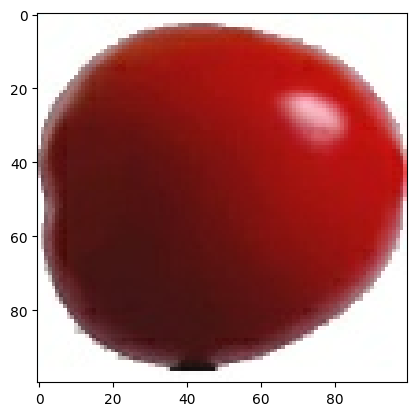

In [137]:
for img, label in test.take(1):
    testing_image = img[0]
    plt.imshow(img[0].numpy().astype("uint8"))
    break

In [146]:
process=feature_extractor(images=image, return_tensors="tf")
embeddings = base_model(process)
X = embeddings.last_hidden_state
X = X[:,0,:]

In [147]:
output = tuned_model.predict(X)
prediction = [fruits_and_vegetables[np.argmax(out)] for out in output]
prediction

1/1 [==============================] - 0s 14ms/step


['Clementine']